In [2]:
from langgraph.graph import StateGraph, MessagesState, START, END
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import ToolNode
from langchain_community.tools import TavilySearchResults
from IPython.display import Image

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "My API Key"



In [5]:
llm = ChatOpenAI(model='gpt-4o-mini', temperature=0)

In [4]:
def should_continue(state: MessagesState) -> bool:
    messages = state['messages']
    last_message = messages[-1]
    if last_message.tool_calls:
        return 'tools'
    else:
        return END



In [ ]:
def call_model(state: MessagesState):
    messages  = state['messages']
    response = llm.invoke(messages)
    
    return {'messages': messages + [response]}

In [ ]:

## Initializing our lang graph

graph = StateGraph(MessagesState)

In [ ]:
##Adding a node to the langgraph

graph.add_node('agent', call_model)

NameError: name 'graph' is not defined

In [ ]:
import os
os.environ["TAVILY_API_KEY"] = "My Api Key"

In [ ]:
# Initializing search tool
search_tool = TavilySearchResults(max_results=5)

In [ ]:
##


tools = [search_tool]

tool_node = ToolNode(tools)

graph.add_node('tools', tool_node)

In [18]:
# This means that the first node is the agent
# similar to setting graph.set_entry_point('agent')
graph.add_edge(START, "agent")

In [ ]:
## Adding conditional edge
graph.add_conditional_edges('agent', should_continue)

In [ ]:
## Adding Standard Edge

graph.add_edge('tools', 'agent')

In [ ]:
## Compliling the graph
graph_compiled = graph.compile()

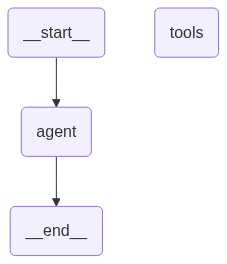

In [22]:
Image(graph_compiled.get_graph().draw_mermaid_png())

In [23]:
output = graph_compiled.invoke({'messages': [
    ('user', 'Write a simple report on how to become pro at trading crypto.')
]})

output

{'messages': [HumanMessage(content='Write a simple report on how to become pro at trading crypto.', additional_kwargs={}, response_metadata={}, id='24cfb02f-6123-4de3-b713-ff1d0342ff26'),
  AIMessage(content='# Report: How to Become Pro at Trading Crypto\n\n## Introduction\nCryptocurrency trading has gained immense popularity over the past decade, attracting both novice and experienced investors. While the potential for high returns is appealing, the volatility and complexity of the crypto market require a strategic approach. This report outlines key steps to becoming a proficient cryptocurrency trader.\n\n## 1. Understand the Basics of Cryptocurrency\nBefore diving into trading, it is essential to grasp the fundamental concepts of cryptocurrency:\n- **What is Cryptocurrency?**: Digital or virtual currencies that use cryptography for security.\n- **Blockchain Technology**: The underlying technology that powers cryptocurrencies, ensuring transparency and security.\n- **Types of Cryptocu

In [24]:
from IPython.display import Markdown

Markdown(output['messages'][-1].content)

# Report: How to Become Pro at Trading Crypto

## Introduction
Cryptocurrency trading has gained immense popularity over the past decade, attracting both novice and experienced investors. While the potential for high returns is appealing, the volatility and complexity of the crypto market require a strategic approach. This report outlines key steps to becoming a proficient cryptocurrency trader.

## 1. Understand the Basics of Cryptocurrency
Before diving into trading, it is essential to grasp the fundamental concepts of cryptocurrency:
- **What is Cryptocurrency?**: Digital or virtual currencies that use cryptography for security.
- **Blockchain Technology**: The underlying technology that powers cryptocurrencies, ensuring transparency and security.
- **Types of Cryptocurrencies**: Familiarize yourself with major cryptocurrencies like Bitcoin (BTC), Ethereum (ETH), and altcoins.

## 2. Educate Yourself
Continuous education is crucial in the fast-evolving crypto landscape:
- **Online Courses**: Enroll in courses that cover trading strategies, technical analysis, and market psychology.
- **Books and Articles**: Read literature on trading strategies, market trends, and successful traders’ experiences.
- **Webinars and Podcasts**: Participate in discussions and listen to experts share insights on market movements.

## 3. Choose a Reliable Exchange
Selecting a trustworthy cryptocurrency exchange is vital for secure trading:
- **Reputation**: Research exchanges with a solid track record and positive user reviews.
- **Security Features**: Look for exchanges that offer two-factor authentication (2FA) and cold storage for funds.
- **Fees and Trading Pairs**: Compare transaction fees and available trading pairs to find the best fit for your trading strategy.

## 4. Develop a Trading Strategy
A well-defined trading strategy is essential for success:
- **Day Trading vs. HODLing**: Decide whether you want to engage in short-term trading or long-term holding.
- **Technical Analysis**: Learn to read charts, identify trends, and use indicators to make informed decisions.
- **Risk Management**: Set stop-loss orders and determine the amount of capital to risk on each trade.

## 5. Stay Informed
The crypto market is influenced by various factors, including news, regulations, and market sentiment:
- **Follow News Outlets**: Stay updated with reputable crypto news websites and social media channels.
- **Join Communities**: Engage with online forums and social media groups to share insights and learn from others.
- **Market Analysis**: Regularly analyze market trends and adjust your strategy accordingly.

## 6. Practice with a Demo Account
Before trading with real money, practice your skills:
- **Demo Trading**: Use demo accounts offered by exchanges to simulate trading without financial risk.
- **Backtesting**: Test your trading strategies on historical data to evaluate their effectiveness.

## 7. Start Small and Scale Up
When you begin trading with real money, start with a small investment:
- **Gradual Increase**: As you gain confidence and experience, gradually increase your investment.
- **Diversification**: Spread your investments across different cryptocurrencies to mitigate risk.

## 8. Keep Emotions in Check
Emotional trading can lead to poor decision-making:
- **Discipline**: Stick to your trading plan and avoid impulsive decisions based on fear or greed.
- **Mindfulness**: Practice mindfulness techniques to maintain focus and reduce stress.

## Conclusion
Becoming a professional cryptocurrency trader requires dedication, education, and a strategic approach. By understanding the fundamentals, developing a solid trading strategy, and staying informed, you can navigate the complexities of the crypto market and increase your chances of success. Remember, trading involves risks, and it is essential to trade responsibly.